### AAPL Stock Price Prediction using LSTM

#### About
This project utilizes Long Short-Term Memory (LSTM) networks to predict Apple Inc. (AAPL) stock prices based on historical stock data. The model employs Keras for building and training the LSTM network.

#### Key Steps:
- **Data Preprocessing:**
  - Load AAPL stock data and select the 'close' price column.
  - Normalize the stock prices with `MinMaxScaler`.
  - Split the dataset into training (70%) and testing (30%) sets.

- **Dataset Creation:**
  - Implement a `create_dataset()` function to transform the time-series data into supervised learning format with a specified `time_steps`.

- **Model Architecture:**
  - Build an LSTM-based model:
    - Two LSTM layers: first with `return_sequences=True`, second without.
    - Output layer: `Dense(1)` for regression.
  - Compile the model using Adam optimizer and Mean Squared Error loss.

- **Model Training:**
  - Train the model for 100 epochs with a batch size of 64.

- **Prediction & Evaluation:**
  - Make predictions for both training and testing sets.
  - Inverse scale the predictions back to original values.
  - Compute Root Mean Squared Error (RMSE) for both train and test sets.

- **Visualization:**
  - Plot actual vs predicted stock prices for both training and testing data.

#### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense
from sklearn.metrics import mean_squared_error

2024-08-07 22:58:19.380866: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-07 22:58:19.386591: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-07 22:58:19.401191: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-07 22:58:19.426512: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-07 22:58:19.434085: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-07 22:58:19.454408: I tensorflow/core/platform/cpu_feature_gu

#### Importing Data

In [4]:
data = pd.read_csv("AAPL_data.csv")

#### Data Pre-Processing

In [5]:
# Select only the 'close' column
data = data[['close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [6]:
# Split data into train and test sets
train_size = int(len(data_scaled) * 0.7)
test_size = len(data_scaled) - train_size
train, test = data_scaled[0:train_size,
                          :], data_scaled[train_size:len(data_scaled), :]

In [7]:
# Function to create dataset
def create_dataset(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset) - time_steps - 1):
        a = dataset[i:(i + time_steps), 0]
        X.append(a)
        Y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(Y)

In [8]:
# Time steps for LSTM
time_steps = 10

# Create the dataset with time steps
X_train, y_train = create_dataset(train, time_steps)
X_test, y_test = create_dataset(test, time_steps)

#### LSTM Model

In [9]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

I0000 00:00:1723051701.983279   10320 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-07 22:58:21.988905: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/shounakpaul/Documents/Code/Machine Learning/Projects/stock-market-prediction/.venv/lib64/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the firs

#### Training

In [10]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0271
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.6603e-04
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 9.2182e-04
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.4809e-04
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 6.8445e-04
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.1956e-04
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.2060e-04
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.9185e-04
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.4208e-04
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 7.0131e-04
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.2990e-04
Epoch 12/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011
Epoch 13/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.6292e-04
Epoch 14/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.6736e-04
Epoch 15/100
67/67 

In [11]:
# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [12]:
# Inverse transform predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

#### Evaluation

In [13]:
# Calculate root mean squared error
train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
print('Train RMSE: %.2f' % (train_score))
print('Test RMSE: %.2f' % (test_score))

Train RMSE: 10.08
Test RMSE: 9.52


#### Visualization

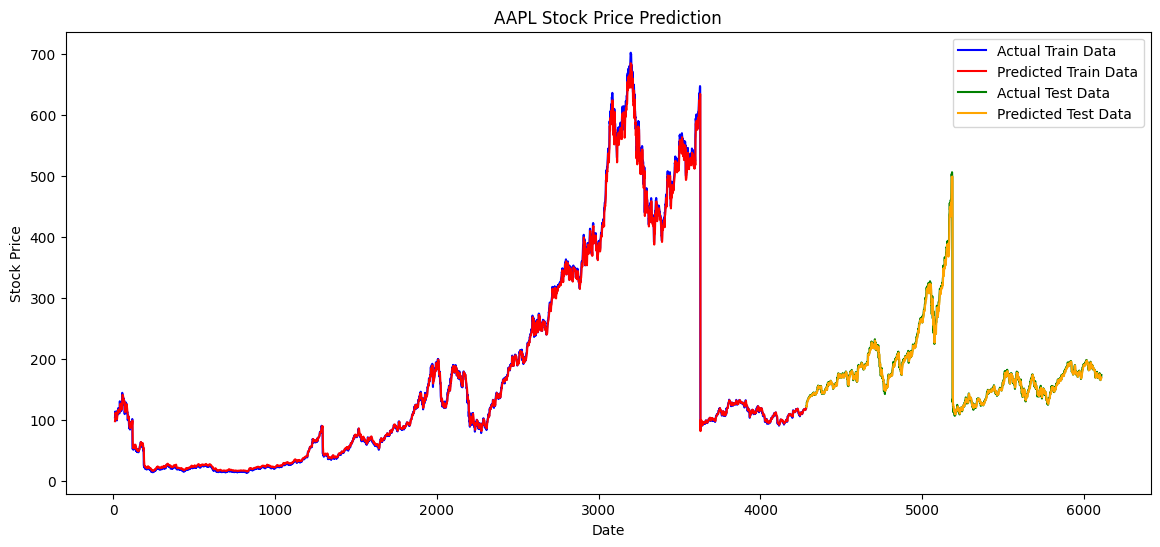

In [14]:
# Plotting
plt.figure(figsize=(14, 6))
plt.plot(data.index[time_steps:time_steps+len(train_predict)],
         y_train[0], color='blue', label='Actual Train Data')
plt.plot(data.index[time_steps:time_steps+len(train_predict)],
         train_predict[:, 0], color='red', label='Predicted Train Data')
plt.plot(data.index[time_steps+len(train_predict)+1:time_steps+len(train_predict) +
         1+len(test_predict)], y_test[0], color='green', label='Actual Test Data')
plt.plot(data.index[time_steps+len(train_predict)+1:time_steps+len(train_predict)+1 +
         len(test_predict)], test_predict[:, 0], color='orange', label='Predicted Test Data')
plt.legend()
plt.title('AAPL Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

#### Results:
- **Train RMSE:** 10.08
- **Test RMSE:** 9.52